In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/zomato_cleaned.csv')
df

,url,online_order,book_table,rate,votes,rest_type,approx_cost(for two people),listed_in(type),listed_in(city),Afghan,...,Spanish,Steak,Street Food,Sushi,Tamil,Tea,Thai,Tibetan,Turkish,Vietnamese
0,https://www.zomato.com/bangalore/jalsa-banasha...,Yes,Yes,4.1,775,Casual Dining,800,Buffet,Banashankari,0,...,0,0,0,0,0,0,0,0,0,0
1,https://www.zomato.com/bangalore/spice-elephan...,Yes,No,4.1,787,Casual Dining,800,Buffet,Banashankari,0,...,0,0,0,0,0,0,0,0,0,0
2,https://www.zomato.com/SanchurroBangalore?cont...,Yes,No,3.8,918,"Cafe, Casual Dining",800,Buffet,Banashankari,0,...,0,0,0,0,0,0,0,0,0,0
3,https://www.zomato.com/bangalore/addhuri-udupi...,No,No,3.7,88,Quick Bites,300,Buffet,Banashankari,0,...,0,0,0,0,0,0,0,0,0,0
4,https://www.zomato.com/bangalore/grand-village...,No,No,3.8,166,Casual Dining,600,Buffet,Banashankari,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13222,https://www.zomato.com/bangalore/fujian-expres...,Yes,No,3.8,182,Food Court,600,Dine-out,Whitefield,0,...,0,0,0,0,0,0,1,0,0,0
13223,https://www.zomato.com/bangalore/nook-aloft-be...,No,Yes,4.2,411,Casual Dining,1800,Dine-out,Whitefield,0,...,0,0,0,0,0,0,0,0,0,0
13224,https://www.zomato.com/bangalore/seeya-restaur...,No,No,3.3,4,Quick Bites,350,Dine-out,Whitefield,0,...,0,0,0,0,0,0,0,0,0,0
13225,https://www.zomato.com/bangalore/andhra-spices...,No,No,3.2,4,Quick Bites,300,Dine-out,Whitefield,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df['rest_type'].nunique()

87

In [27]:
df['online_order'] = df['online_order'].apply(lambda x: 1 if x == 'Yes' else 0)
df['book_table'] = df['book_table'].apply(lambda x: 1 if x == 'Yes' else 0)

In [28]:
x = df.drop(['rate', 'url'], axis=1)
y = df['rate']

In [29]:
y = y.apply(lambda x: 1 if x >= 3.75 else 0)

In [30]:
cat = x.select_dtypes(include='object').columns
numeric = x.select_dtypes(exclude='object').columns

In [31]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first')
cat_data = ohe.fit_transform(x[cat]).toarray() 

In [32]:
x = pd.concat([x[numeric], pd.DataFrame(cat_data, columns=ohe.get_feature_names_out(cat))], axis=1)

c:\Users\Yousef\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [33]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x , y , test_size=0.2, random_state= 42, stratify=y)

In [34]:
y_train.value_counts()

0    5881
1    4700
Name: rate, dtype: int64

In [35]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
x_train , y_train = smote.fit_resample(x_train,y_train)

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, classification_report, plot_confusion_matrix

### DecisionTree

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5881
           1       1.00      1.00      1.00      5881

    accuracy                           1.00     11762
   macro avg       1.00      1.00      1.00     11762
weighted avg       1.00      1.00      1.00     11762

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1471
           1       0.80      0.80      0.80      1175

    accuracy                           0.82      2646
   macro avg       0.82      0.82      0.82      2646
weighted avg       0.82      0.82      0.82      2646



c:\Users\Yousef\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


,Actual,Predicted
13061,0,0
9100,0,0
272,0,0
4194,1,1
7149,1,0
...,...,...
11914,0,1
5519,1,1
1558,1,1
11659,0,0


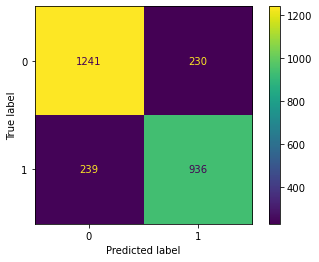

In [38]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
dtc = DecisionTreeClassifier()
dtc.fit(x_train_scaled,y_train)
y_pred_dtc = dtc.predict(x_test_scaled)
print(classification_report(y_train, dtc.predict(x_train_scaled)))
print(classification_report(y_test, y_pred_dtc))
plot_confusion_matrix(dtc, x_test_scaled, y_test)
dt_dataframe = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_dtc})
dt_dataframe

### RandomForest

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      5881
           1       0.97      0.94      0.96      5881

    accuracy                           0.96     11762
   macro avg       0.96      0.96      0.96     11762
weighted avg       0.96      0.96      0.96     11762

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1471
           1       0.85      0.82      0.83      1175

    accuracy                           0.86      2646
   macro avg       0.85      0.85      0.85      2646
weighted avg       0.86      0.86      0.85      2646



c:\Users\Yousef\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


,Actual,Predicted
13061,0,1
9100,0,0
272,0,0
4194,1,1
7149,1,1
...,...,...
11914,0,1
5519,1,1
1558,1,1
11659,0,0


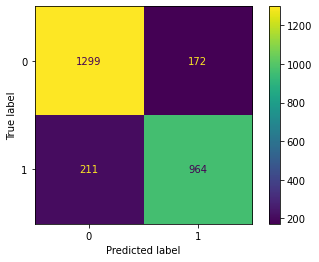

In [40]:
from sklearn.ensemble import RandomForestClassifier
#rf = RandomForestClassifier(max_depth=15, random_state=42, n_estimators=100,min_samples_leaf=4, min_samples_split=2, max_features='sqrt')
rf = RandomForestClassifier( random_state=42, n_estimators=100, max_depth=25, min_samples_leaf=1)
#rf = RandomForestClassifier()
rf.fit(x_train_scaled,y_train)
y_pred_rf = rf.predict(x_test_scaled)
print(classification_report(y_train, rf.predict(x_train_scaled)))
print(classification_report(y_test, y_pred_rf))
plot_confusion_matrix(rf, x_test_scaled, y_test)
rf_dataframe = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})
rf_dataframe

In [41]:
from sklearn.model_selection import KFold,cross_validate
kfold = KFold(n_splits=10)
scores = cross_validate(rf,x_train_scaled,y_train,cv=kfold)
scores

{'fit_time': array([1.63148379, 1.695544  , 1.72156644, 1.63749146, 1.60145783,
        1.60045719, 1.59144902, 1.58043909, 1.61046624, 1.61747265]),
 'score_time': array([0.02602386, 0.03302979, 0.02502489, 0.02602339, 0.02602363,
        0.02602339, 0.02602363, 0.02502275, 0.0260241 , 0.0240221 ]),
 'test_score': array([0.85726423, 0.83262532, 0.83333333, 0.8452381 , 0.83418367,
        0.83163265, 0.82908163, 0.84183673, 0.8494898 , 0.81802721])}

In [42]:
scores['test_score'].mean()

0.8372712678954335

### xgboost

              precision    recall  f1-score   support

           0       0.90      0.91      0.91      5881
           1       0.91      0.90      0.90      5881

    accuracy                           0.90     11762
   macro avg       0.90      0.90      0.90     11762
weighted avg       0.90      0.90      0.90     11762

              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1471
           1       0.82      0.81      0.82      1175

    accuracy                           0.84      2646
   macro avg       0.84      0.83      0.83      2646
weighted avg       0.84      0.84      0.84      2646



c:\Users\Yousef\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


,Actual,Predicted
13061,0,1
9100,0,0
272,0,0
4194,1,1
7149,1,0
...,...,...
11914,0,1
5519,1,1
1558,1,1
11659,0,0


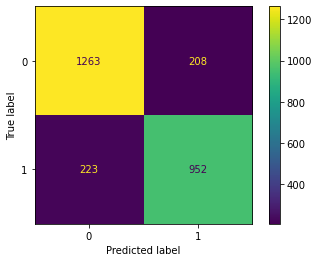

In [155]:
from xgboost import XGBClassifier
#xgb = XGBClassifier(gamma=2, learning_rate=0.1, max_depth=40, n_estimators=50, reg_alpha=3, reg_lambda=0.5, subsample = 0.6, n_jobs=-1)
xgb = XGBClassifier(n_jobs=-1, gamma=1, subsample = 0.4)
xgb.fit(x_train_scaled,y_train)
y_pred_xgb = xgb.predict(x_test_scaled)
print(classification_report(y_train, xgb.predict(x_train_scaled)))
print(classification_report(y_test, y_pred_xgb))
plot_confusion_matrix(xgb, x_test_scaled, y_test)
xgb_dataframe = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_xgb})
xgb_dataframe

In [156]:
from sklearn.model_selection import KFold,cross_validate
kfold = KFold(n_splits=10)
scores = cross_validate(xgb,x_train_scaled,y_train,cv=kfold)
scores

{'fit_time': array([1.56742501, 1.50637245, 1.57944012, 1.67152023, 1.4643333 ,
        1.40227675, 1.41328669, 1.61246967, 1.54540658, 1.74358916]),
 'score_time': array([0.00400376, 0.00400257, 0.00600624, 0.00500512, 0.00400233,
        0.00500488, 0.00400376, 0.00500298, 0.00700784, 0.00600505]),
 'test_score': array([0.83687341, 0.83432455, 0.81972789, 0.84268707, 0.83333333,
        0.81717687, 0.82568027, 0.83163265, 0.83843537, 0.86394558])}

In [157]:
scores['test_score'].mean()

0.8343817008536636

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [20, 25, 30, 35, 40, 45, 50],
    'gamma': [1, 1.5, 2, 3],
    'subsample': [0.4, 0.6, 0.8],
    'reg_alpha': [1, 2, 3],
    'reg_lambda': [0.1, 0.5, 1],
}
grid_search = GridSearchCV(xgb,param_grid=param_grid,cv=3, n_jobs=-1, verbose=3)
grid_search.fit(x_train_scaled,y_train)

Fitting 3 folds for each of 756 candidates, totalling 2268 fits


KeyboardInterrupt: 

In [22]:
final_xgb_model = grid_search.best_estimator_
final_xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=1, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=40, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [23]:
list[final_xgb_model]

list[XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=1, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=40, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)]

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      5881
           1       0.87      0.87      0.87      5881

    accuracy                           0.87     11762
   macro avg       0.87      0.87      0.87     11762
weighted avg       0.87      0.87      0.87     11762

              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1471
           1       0.81      0.82      0.82      1175

    accuracy                           0.84      2646
   macro avg       0.84      0.84      0.84      2646
weighted avg       0.84      0.84      0.84      2646



c:\Users\Yousef\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


,Actual,Predicted
13061,0,1
9100,0,0
272,0,0
4194,1,1
7149,1,0
...,...,...
11914,0,1
5519,1,1
1558,1,1
11659,0,0


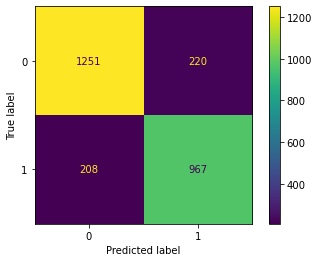

In [124]:
xgb2 = XGBClassifier(gamma=5, learning_rate=0.1, max_depth=40, n_estimators=50, reg_alpha=2, subsample = 0.8, n_jobs=-1)
xgb2.fit(x_train_scaled,y_train)
y_pred_xgb2 = xgb2.predict(x_test_scaled)
print(classification_report(y_train, xgb2.predict(x_train_scaled)))
print(classification_report(y_test, y_pred_xgb2))
plot_confusion_matrix(xgb2, x_test_scaled, y_test)
xgb_dataframe = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_xgb2})
xgb_dataframe

In [125]:
from sklearn.model_selection import KFold,cross_validate
kfold = KFold(n_splits=10)
scores = cross_validate(xgb2,x_train_scaled,y_train,cv=kfold)
scores

{'fit_time': array([3.26897407, 3.04577279, 3.20792055, 2.92165947, 3.01174116,
        2.94868398, 3.07579708, 2.92766523, 2.96069551, 2.88562465]),
 'score_time': array([0.00700617, 0.004004  , 0.00500679, 0.00500488, 0.0050056 ,
        0.00400376, 0.00500655, 0.00500488, 0.00500464, 0.00500488]),
 'test_score': array([0.85131691, 0.83092608, 0.82397959, 0.82653061, 0.83333333,
        0.80357143, 0.81972789, 0.81717687, 0.82568027, 0.82908163])}

In [126]:
scores['test_score'].mean()

0.8261324623307267

### KNN

evaluation for training 
               precision    recall  f1-score   support

           0       0.70      0.82      0.75      5881
           1       0.78      0.65      0.71      5881

    accuracy                           0.73     11762
   macro avg       0.74      0.73      0.73     11762
weighted avg       0.74      0.73      0.73     11762

evaluation for testing 
               precision    recall  f1-score   support

           0       0.69      0.78      0.73      1471
           1       0.67      0.56      0.61      1175

    accuracy                           0.68      2646
   macro avg       0.68      0.67      0.67      2646
weighted avg       0.68      0.68      0.68      2646



c:\Users\Yousef\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


,Actual,Predicted
13061,0,0
9100,0,0
272,0,0
4194,1,0
7149,1,0
...,...,...
11914,0,0
5519,1,1
1558,1,1
11659,0,1


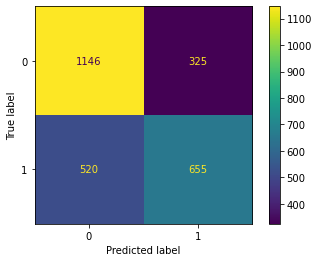

In [128]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(x_train_scaled,y_train)
y_pred_knn = knn.predict(x_test_scaled)
print('evaluation for training \n',classification_report(y_train,knn.predict(x_train_scaled)))
print('evaluation for testing \n',classification_report(y_test,y_pred_knn))
plot_confusion_matrix(knn, x_test_scaled, y_test)
knn_dataframe = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_knn})
knn_dataframe